In [1]:
%load_ext autoreload
%autoreload 2

In [64]:
import os,sys
sys.path.insert(0,"..")
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
import skimage, skimage.exposure


In [35]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [3]:
import torchxrayvision as xrv

In [180]:
img = skimage.io.imread("../tests/00000001_000.png")
img = img[None, :, :]

transform = torchvision.transforms.Compose([xrv.datasets.XRayCenterCrop(),
                                            xrv.datasets.XRayResizer(224)])
img = transform(img)

In [181]:
model.pathologies

['Atelectasis',
 'Consolidation',
 'Infiltration',
 'Pneumothorax',
 'Edema',
 'Emphysema',
 'Fibrosis',
 'Effusion',
 'Pneumonia',
 'Pleural_Thickening',
 'Cardiomegaly',
 'Nodule',
 'Mass',
 'Hernia',
 'Lung Lesion',
 'Fracture',
 'Lung Opacity',
 'Enlarged Cardiomediastinum']

In [182]:
model = xrv.models.DenseNet(weights="densenet121-res224-all")

In [223]:
#!mkdir exposure

In [267]:
def f(exposure):
    timg = skimage.exposure.adjust_gamma(img, exposure)
    timg = xrv.datasets.normalize(timg, 255)
    timg = timg[None, :, :]
    
    fig, a =  plt.subplots(1,2, figsize=(7,4), dpi=100)
    fig.patch.set_facecolor('white')
    a[0].set_title(f'Exposure: {exposure}');
    a[0].imshow(timg[0][0], cmap="Greys_r");
    a[0].axis('off')

    with torch.no_grad():
        output = model(torch.from_numpy(timg))
        for i, (k,v) in enumerate(zip(model.pathologies,output.numpy()[0])):
            c = "gray"
            if v < 0.4:
                c = "black"
            elif v > 0.6:
                c = "red"
            a[1].text(0, 1-i/18, f'{k}:{v:.2}\n', dict(size=10), c=c);
    
    a[1].axis('off')
    plt.show()
    fig.savefig(f'exposure/exposure_{int(exposure*10):03d}.png')
    

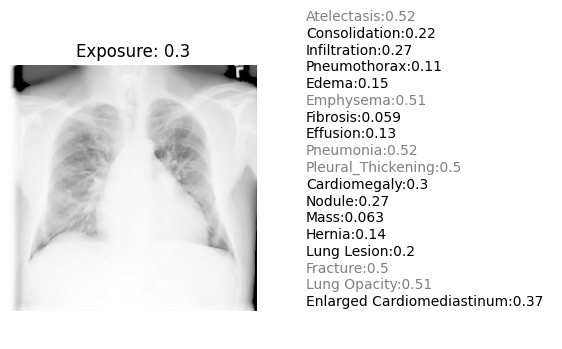

In [268]:
f(0.3)

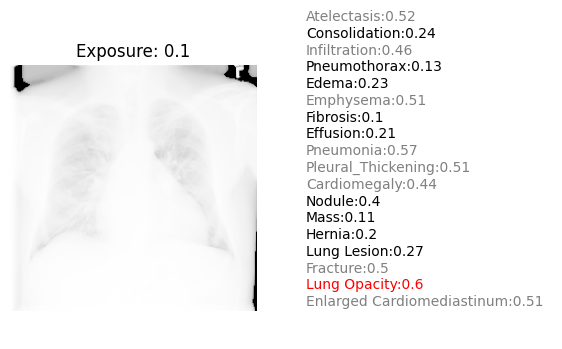

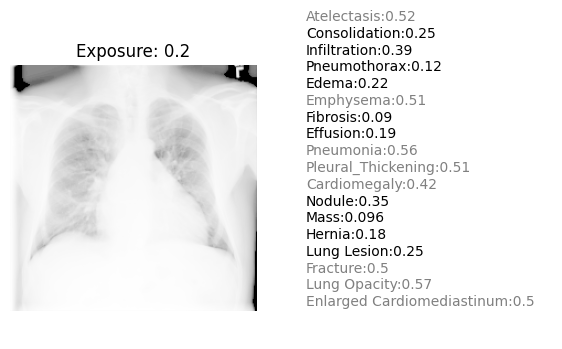

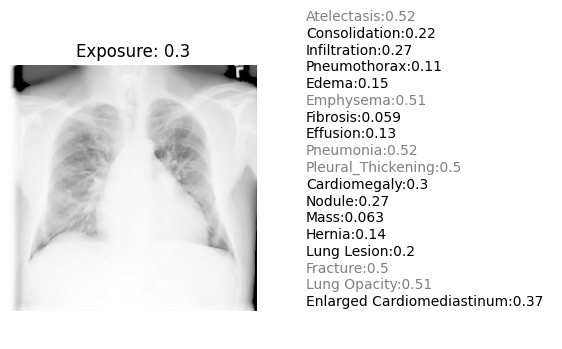

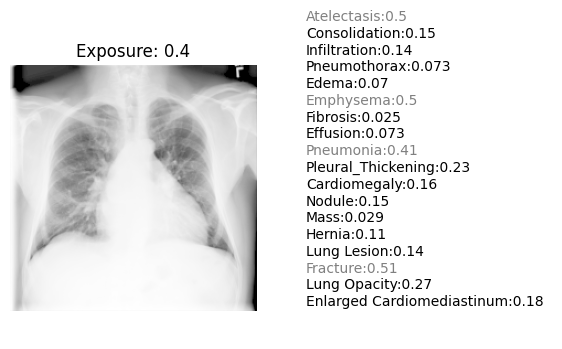

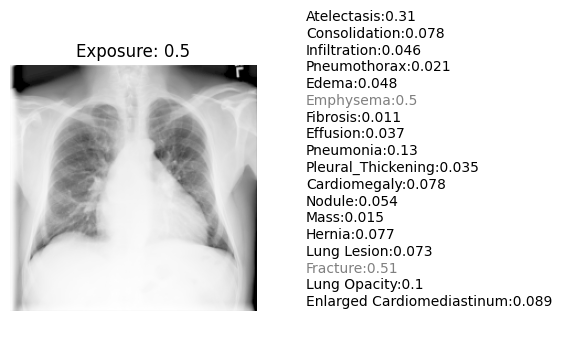

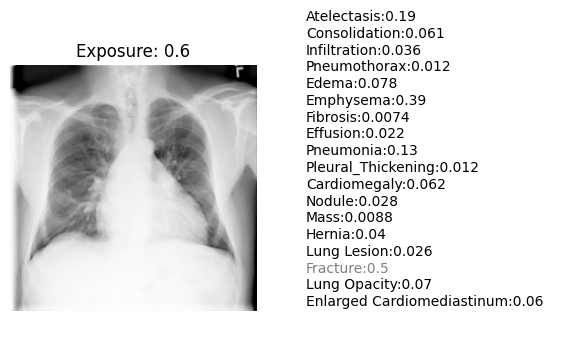

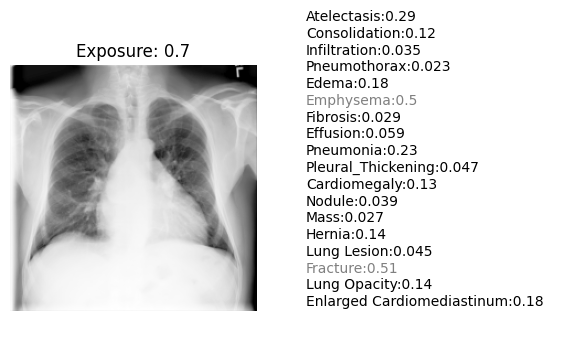

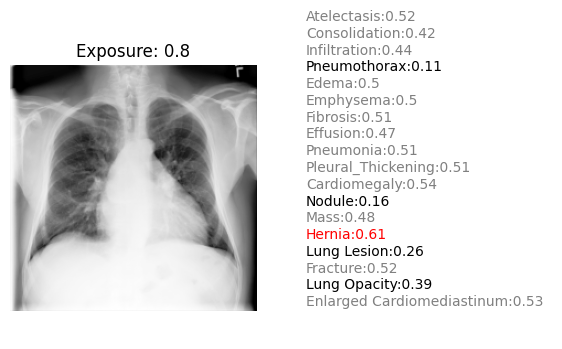

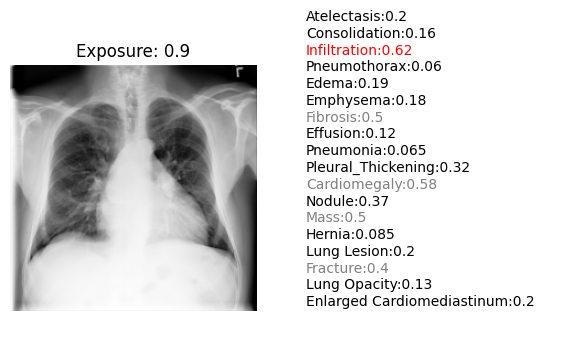

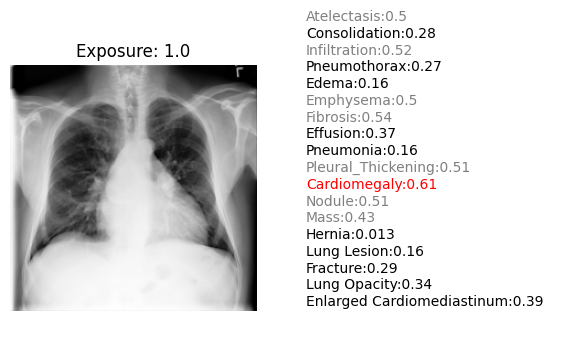

[None, None, None, None, None, None, None, None, None, None]

In [269]:
[f(i/10) for i in range(1,11)] 

In [211]:
interact(f, exposure=(0.0, 1.0));

interactive(children=(FloatSlider(value=0.5, description='exposure', max=1.0), Output()), _dom_classes=('widge…